# Ejercicios

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

En este notebook de ejercicios vais a trabajar con el dataset 'penguins', el cual posee características de distintos pingüinos.

In [7]:
data = sns.load_dataset('penguins')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Ejercicio 1

Genera un gráfico de regresión usando las variables 'bill_length_mm' y 'flipper_length_mm'. Implementa este gráfico separado por la variable 'sex'.

Si implementamos el gráfico sin separar por sexo, podemos usar 'regplot'. 

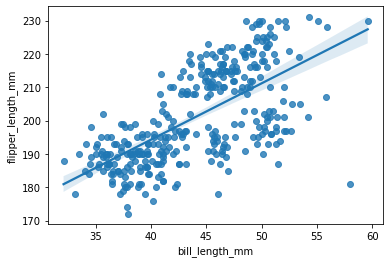

In [11]:
sns.regplot(x = 'bill_length_mm', y = 'flipper_length_mm', data = data)

Para separar por sexo, vamos a usar el gráfico ***lmplot***

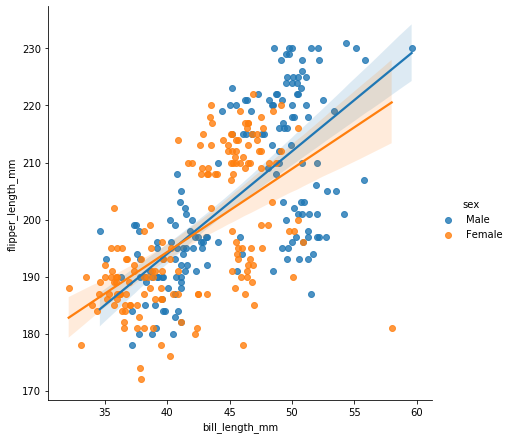

In [12]:
sns.lmplot(x = 'bill_length_mm', y= 'flipper_length_mm', data = data, height = 6, hue = 'sex')

También podríamos implemenatarlo usando 'FacetGrid'

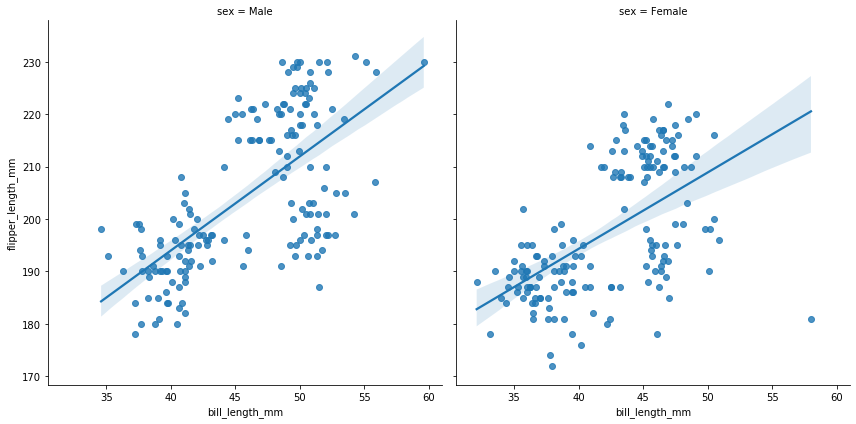

In [15]:
g = sns.FacetGrid(data = data, col = 'sex', height=6)
g.map(sns.regplot, 'bill_length_mm', 'flipper_length_mm')

## Ejercicio 2

¿Existe algún valor anómalo (outlier) en alguna variable?

In [18]:
data.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

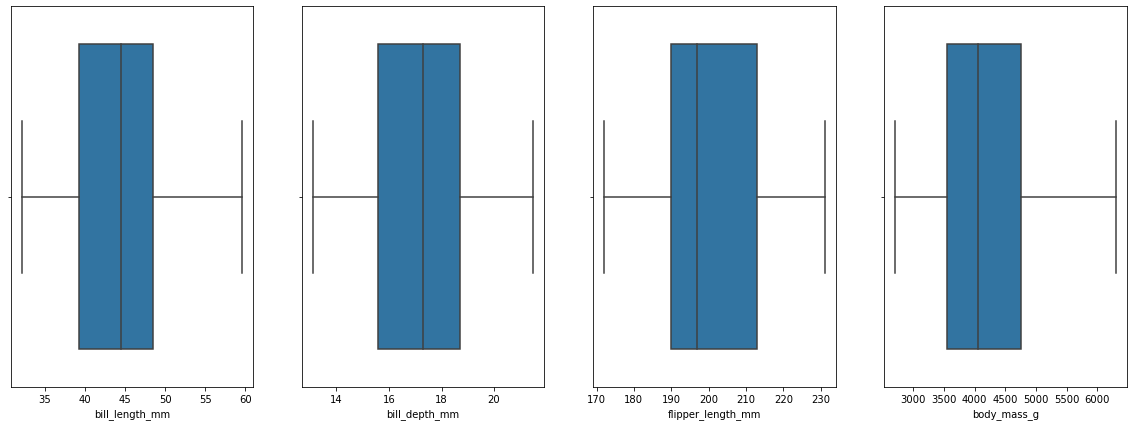

In [29]:
cols = ['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']

i=0
fig, ax = plt.subplots(ncols = 4, figsize = (20, 7))
for c in cols:
    sns.boxplot(data[c], ax = ax[i])
    i+=1

## Ejercicio 3

Genera un gráfico que contenga todas las combinaciones de variables. Dicho gráfico debe contener:
- Un histograma en la diagonal
- Un gráfico de puntos encima de la diagonal
- Un gráfico de distribución debajo de la diagonal


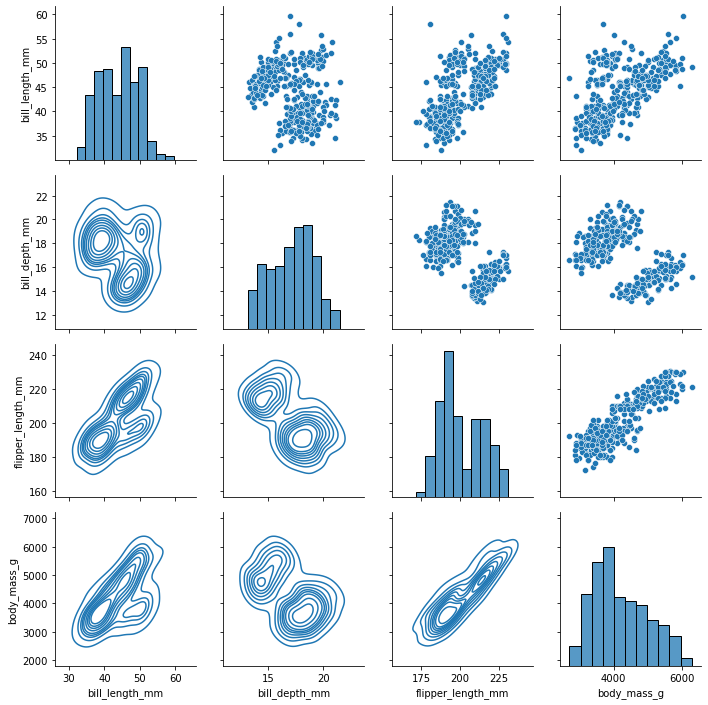

In [31]:
g = sns.PairGrid(data = data)
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)